<a href="https://colab.research.google.com/github/Ch0k/ML-DZ11/blob/main/ansablirovanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline
from sklearn.model_selection import train_test_split 

1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [199]:
data = pd.read_csv('heart.csv')

In [200]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [201]:
type(data)

pandas.core.frame.DataFrame

In [202]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2) Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [204]:
#sns.pairplot(data)

In [205]:
categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data[categorials].nunique()

In [206]:
categorials

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [207]:
categorials_nunique

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [208]:
data_cat = pd.get_dummies(data[categorials], columns=categorials)

In [209]:
data = data.drop(categorials,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [210]:
data = pd.concat([data, data_cat], axis=1)

In [211]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [212]:
#sns.pairplot(data)

In [213]:
X = data.drop(['HeartDisease'], axis = 1)

In [214]:
X.shape

(918, 20)

In [215]:
y = data['HeartDisease']

In [216]:
y.shape

(918,)

3) Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

4) Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [219]:
clf = DecisionTreeClassifier(random_state=0)

In [220]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [221]:
cross_val_score(clf, X_train, y_train, cv=10)


array([0.82432432, 0.77027027, 0.72972973, 0.81081081, 0.78082192,
       0.75342466, 0.79452055, 0.8630137 , 0.89041096, 0.76712329])

In [222]:
 clf.score(X_train, y_train)

1.0

In [223]:
 clf.score(X_test, y_test)

0.7554347826086957

In [255]:
 y_predict = clf.predict(X_test)

Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [256]:
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        77
           1       0.76      0.66      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.68      0.68       184



In [226]:
#X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)

In [227]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [228]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [229]:
 clf_rf.score(X_train, y_train)

0.8474114441416893

In [230]:
clf_rf.score(X_test, y_test)

0.7934782608695652

In [251]:
 y_predict = clf_rf.predict(X_train)

Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [252]:
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       333
           1       0.84      0.90      0.87       401

    accuracy                           0.85       734
   macro avg       0.85      0.84      0.84       734
weighted avg       0.85      0.85      0.85       734



Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [233]:
imp = pd.Series(clf_rf.feature_importances_)

In [234]:
imp.index = pd.Series(X_train.columns)

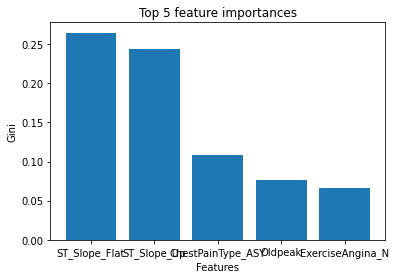

In [235]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

In [236]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [237]:
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=0).fit(X_test, y_test)



In [238]:
 clf.score(X_train, y_train)

0.7138964577656676

In [239]:
clf.score(X_test, y_test)

0.6793478260869565

In [243]:
y_predict = clf.predict(X_train)

In [245]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       333
           1       0.77      0.68      0.72       401

    accuracy                           0.71       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.72      0.71      0.71       734



In [257]:
from sklearn.svm import LinearSVC

In [258]:
from sklearn.ensemble import StackingClassifier

In [264]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('dt', DecisionTreeClassifier(random_state=42)),
     ('svr', LinearSVC(random_state=42))]

In [265]:
clf = StackingClassifier(
     estimators=estimators)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.8695652173913043

In [268]:
clf.score(X_test, y_test)

0.8695652173913043

In [267]:
clf.score(X_train, y_train)

0.9700272479564033

In [269]:
y_predict = clf.predict(X_train)

In [270]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       333
           1       0.96      0.99      0.97       401

    accuracy                           0.97       734
   macro avg       0.97      0.97      0.97       734
weighted avg       0.97      0.97      0.97       734



Стекнинг показал лучшие результаты